In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.colors import ListedColormap

In [4]:
nrows, ncols = 20,20
m = np.zeros((nrows, ncols), dtype=np.uint8)

In [5]:
for i in range(15):
    x, y = np.random.randint(0, nrows), np.random.randint(0, ncols)
    h, w = np.random.randint(1, 6), np.random.randint(1, 6)
    m[x:x+w+1, y] = 1
    m[x, y:y+h+1] = 1    
m

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

<IPython.core.display.Javascript object>


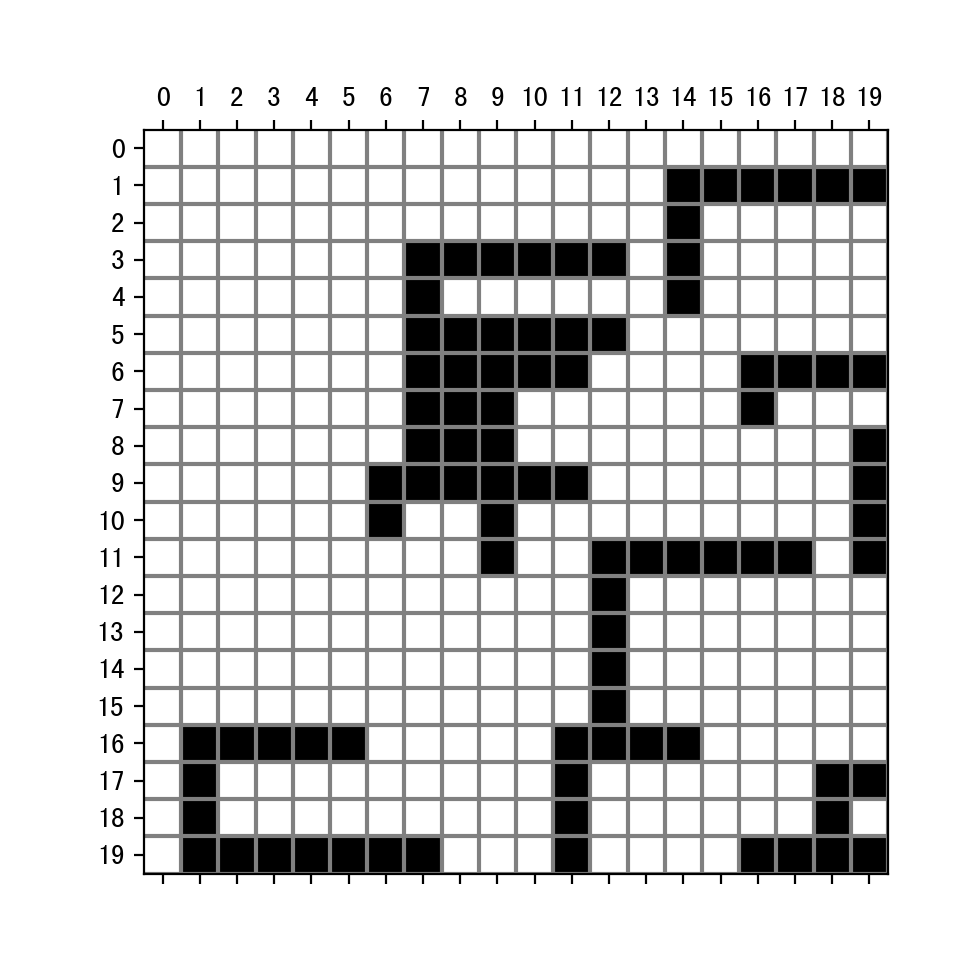

In [6]:
%matplotlib notebook

plt.matshow(m, cmap=ListedColormap(['w', 'k']))
plt.xticks(np.arange(0, nrows))
plt.yticks(np.arange(0, ncols))
for i in range(nrows):
    plt.axhline(y=0.5+i, color='gray', linestyle='-')
for i in range(nrows):
    plt.axvline(x=0.5+i, color='gray', linestyle='-')

plt.show()

In [ ]:
 def shortestPathBinaryMatrix(grid, s, e):
    n = len(grid)
    queue = [s]
    visited = {s: None}
    path = []

    while queue:
        x, y = queue.pop(0)
        for dx, dy in [(-1, 0), (0, 1), (1, 0), (0, -1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited and grid[nx][ny] == 0:
                if (nx, ny) == e:
                    path.append((x, y))
                    node = visited[(x, y)]
                    while node:
                        path.append(node)
                        node = visited[node]
                    return path[::-1]
                queue.append((nx, ny))
                visited[(nx, ny)] = (x, y)
    return path

In [ ]:
def shortestPathBinaryMatrix(grid, s, e):
    n = len(grid)
    queue = [s]
    visited = {s: None}
    path = []

    while queue:
        x, y = queue.pop(0)
        for dx, dy in [(-1, 0), (0, 1), (1, 0), (0, -1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited and grid[nx][ny] == 0:
                if (nx, ny) == e:
                    path.append((x, y))
                    node = visited[(x, y)]
                    while node:
                        path.append(node)
                        node = visited[node]
                    return path[::-1]
                queue.append((nx, ny))
                visited[(nx, ny)] = (x, y)
    return path

<IPython.core.display.Javascript object>


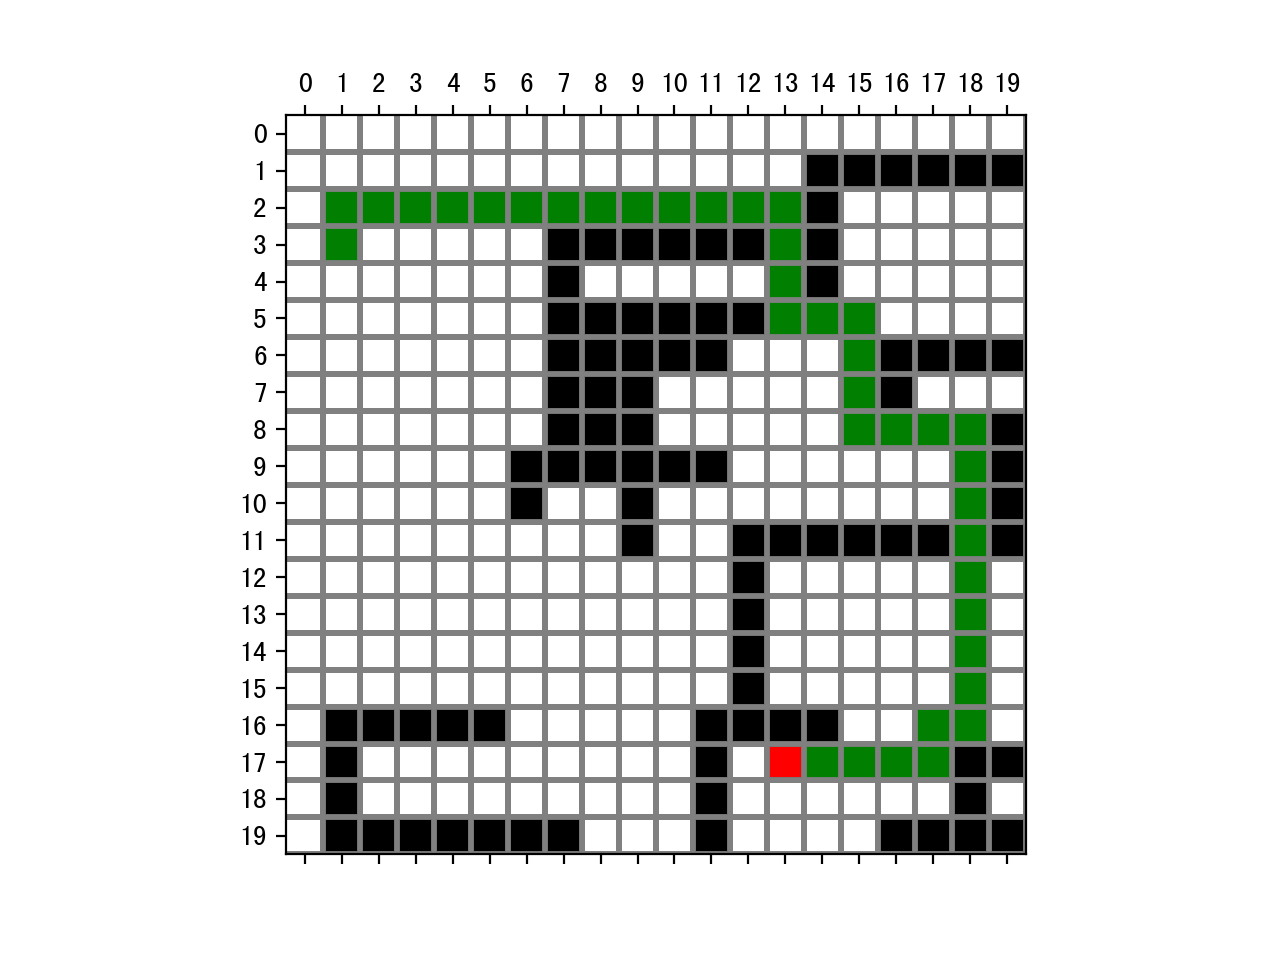

In [10]:
s = (3, 1)
e = (17, 13)
# import random
# zeros = [tuple(x) for x in np.argwhere(m==0).tolist()]
# s = random.choice(zeros)
# zeros.remove(s)
# e = random.choice(zeros)

path = shortestPathBinaryMatrix(m, s, e)
mm = m.copy()
mm[s] = 3
mm[e] = 2

def init():
    plt.xticks(np.arange(0, nrows))
    plt.yticks(np.arange(0, ncols))
    for i in range(nrows):
        plt.axhline(y=0.5 + i, color='gray', linestyle='-')
    for i in range(nrows):
        plt.axvline(x=0.5 + i, color='gray', linestyle='-')

fig, ax = plt.subplots()
mat = ax.matshow(mm, cmap=ListedColormap(['w', 'k', 'r', 'g']))
init()

def update(frame):
    mm[path[frame]] = 3
    mat.set_data(mm)
#     mat.set_cmap(ListedColormap(['w', 'k', 'r', 'g']))
#     new_mat = ax.matshow(mm, cmap=ListedColormap(['w', 'k', 'r', 'g']))
    return mat,

ani = animation.FuncAnimation(fig, func=update, frames=len(path), init_func=init, interval=100)
plt.show()

In [1]:
def shortestPathBinaryMatrix():
    grid = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]], dtype=np.int)
    s = (3, 1)
    e = (17, 13)
    n = len(grid)
    queue = [s]
    visited = {s: None}
    path = []
    explored = grid.copy()
    explored[s] = 2
    explored[e] = 3

    while queue:
        x, y = queue.pop(0)
        for dx, dy in [(-1, 0), (0, 1), (1, 0), (0, -1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited and grid[nx][ny] == 0:
                if (nx, ny) == e:
                    path.append((x, y))
                    node = visited[(x, y)]
                    while node:
                        path.append(node)
                        node = visited[node]
                    # return path[::-1]
                    grid[s] = 2
                    grid[e] = 3
                    for p in grid:
                        grid[p] = 2
                    return grid
                queue.append((nx, ny))
                visited[(nx, ny)] = (x, y)
                explored[(nx, ny)] = 4
                yield explored
    return path

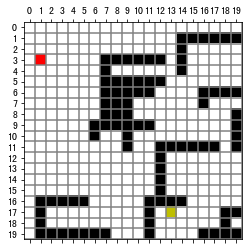

In [7]:
m = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]], dtype=np.int)
nrows, ncols = 20, 20
s = (3, 1)
e = (17, 13)
# import random
# zeros = [tuple(x) for x in np.argwhere(m==0).tolist()]
# s = random.choice(zeros)
# zeros.remove(s)
# e = random.choice(zeros)

# path = shortestPathBinaryMatrix(m, s, e)
mm = m.copy()
mm[s] = 2
mm[e] = 3


def init():
    plt.xticks(np.arange(0, nrows))
    plt.yticks(np.arange(0, ncols))
    for i in range(nrows):
        plt.axhline(y=0.5 + i, color='gray', linestyle='-')
    for i in range(nrows):
        plt.axvline(x=0.5 + i, color='gray', linestyle='-')


fig, ax = plt.subplots()
mat = ax.matshow(mm, cmap=ListedColormap(['w', 'k', 'g', 'r', 'y']))
init()


def update(data):
    mat.set_data(data)
    return mat,


ani = animation.FuncAnimation(fig, func=update, frames=shortestPathBinaryMatrix, init_func=init, interval=100)
plt.show()
